# Création des données et importations des packages

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
import scipy.stats as scs

import pickle
import seaborn as sns

from python.objets.wobjet import WDegCarre
from python.objets.lentille import LentilleGravita
from python.plotfunctions import *


lentilles_list = pickle.load(open("./source_pickle/lentilles_list2", "rb"))
obj_list = pickle.load(open("./source_pickle/fields", "rb"))


In [31]:
D = [[lent.seeing, lent.exposition] for lent in lentilles_list]
df = pd.DataFrame(np.array(D), columns=["Seeing", "Exposition"])
file_lentilles2 = "./source/Lentilles.csv"
data_lentilles2 = pd.read_csv(file_lentilles2, header=0, sep=";", skiprows=[1])

df = pd.concat([data_lentilles2, df], axis=1)
df.drop(["_RAB1950", "_DEB1950", "RAJ2000", "DEJ2000", "CFHTLS",
        "Simbad", "n_ID", "Rank"], axis=1, inplace=True)
df.columns = ["Galactic longitude", "Galactic latitude", "Right ascension", "Declination",
              "Ecliptic longitude", "Ecliptic latitude", "ID", "g_band_magnitude", "r_band_magnitude", "i_band_magnitude", "redshift", "redshift uncertainity", "redshift from literature",
              "Arc Radius $R_A$ (arcsec)", r"$R_A$ ($h^{-1}kpc$)", "Detection Type", "Field", "Seeing", "Exposition"]
df.head()

,Galactic longitude,Galactic latitude,Right ascension,Declination,Ecliptic longitude,Ecliptic latitude,ID,g_band_magnitude,r_band_magnitude,i_band_magnitude,redshift,redshift uncertainity,redshift from literature,Arc Radius $R_A$ (arcsec),$R_A$ ($h^{-1}kpc$),Detection Type,Field,Seeing,Exposition
0,168.949876,-65.666487,30.341208,-9.254192,24.793198,-20.234664,SA1,22.06,20.58,19.90,0.46,0.02,,2.2,9.0,A,W1,0.596,97.0
1,172.483968,-66.943586,30.543750,-11.153244,24.243096,-22.073947,SA2,19.79,18.48,17.80,0.48,0.02,,5.0,20.9,A,W1,0.789,41.0
2,165.620692,-63.387385,30.661958,-6.582256,26.131538,-17.859779,SA3,20.89,19.91,19.54,0.37,0.03,,2.2,7.9,A,W1,0.572,80.0
3,168.324243,-64.710299,30.761833,-8.353958,25.553620,-19.547713,SA4,21.96,20.57,19.99,0.14,0.07,,2.4,4.1,V,W1,0.667,80.0
4,172.308850,-66.502038,30.802542,-10.785542,24.643932,-21.825888,SA5,22.02,20.55,19.52,0.62,0.03,,3.0,14.3,V,W1,0.789,41.0


# Biais

In [32]:
def centrer_reduit(array):
    return (array-np.mean(array))/np.std(array)


## Seeing

In [33]:
seeing_list_lentille = np.array(
    [lentille.seeing for lentille in lentilles_list])
seeing_list_obj = np.array([obj.seeing for obj in obj_list])

seeing_list_lentille_noNA = seeing_list_lentille[~np.isnan(
    seeing_list_lentille)]
seeing_list_obj_noNA = seeing_list_obj[~np.isnan(seeing_list_obj)]


seeing_list_lentille_01 = centrer_reduit(seeing_list_lentille_noNA)
seeing_list_obj_01 = centrer_reduit(seeing_list_obj_noNA)


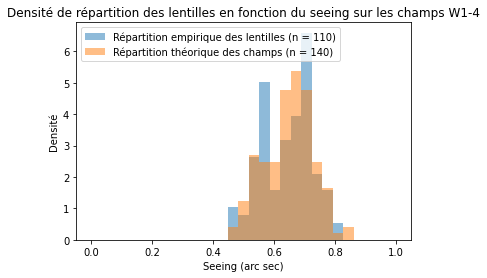

C:\Users\Clément\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Clément\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Clément\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Clément\AppDat

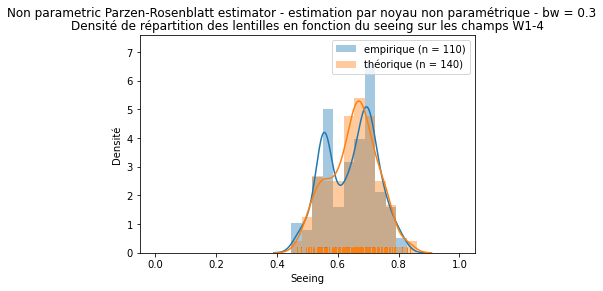

In [34]:
bins = np.linspace(0, 1, 30)

plt.hist(seeing_list_lentille_noNA, bins, alpha=0.5, density=True,
         label=f"Répartition empirique des lentilles (n = {len(seeing_list_lentille_noNA)})")
plt.hist(seeing_list_obj_noNA, bins, alpha=0.5, density=True,
         label=f"Répartition théorique des champs (n = {len(seeing_list_obj_noNA)})")
plt.legend(loc='upper left')
plt.title(
    "Densité de répartition des lentilles en fonction du seeing sur les champs W1-4")
plt.xlabel("Seeing (arc sec)")
plt.ylabel("Densité")
plt.show()


bw_dict = {'bw': 0.3}
sns.distplot(seeing_list_lentille_noNA, kde=True, bins=bins, rug=True, kde_kws=bw_dict,
             label=f"empirique (n = {len(seeing_list_lentille_noNA)})")
sns.distplot(seeing_list_obj_noNA, kde=True, bins=bins, rug=True, kde_kws=bw_dict,
             label=f"théorique (n = {len(seeing_list_obj_noNA)})")
plt.legend(loc='upper right')
plt.title(
    "Densité de répartition des lentilles en fonction du seeing sur les champs W1-4")
plt.suptitle(
    f"Non parametric Parzen-Rosenblatt estimator - estimation par noyau non paramétrique - bw = {bw_dict['bw']}")
plt.xlabel("Seeing")
plt.ylabel("Densité")
plt.show()


C:\Users\Clément\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\Clément\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


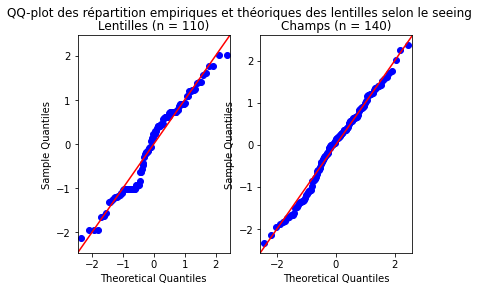

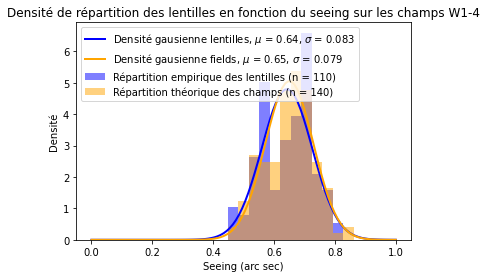

In [35]:
#qqplots
fig, (axe0, axe1) = plt.subplots(1, 2)
make_global_title(
    fig,
    title="QQ-plot des répartition empiriques et théoriques des lentilles selon le seeing")
sm.qqplot(seeing_list_lentille_01, line='45', ax=axe0, )
sm.qqplot(seeing_list_obj_01, line='45', ax=axe1)
axe0.title.set_text(f"Lentilles (n = {len(seeing_list_lentille_01)})")
axe1.title.set_text(f"Champs (n = {len(seeing_list_obj_01)})")

plt.show()

#theorical normal
mu_l, std_l = norm.fit(seeing_list_lentille_noNA)
mu_w, std_w = norm.fit(seeing_list_obj_noNA)

plt.hist(seeing_list_lentille_noNA, bins, alpha=0.5, density=True,
         label=f"Répartition empirique des lentilles (n = {len(seeing_list_lentille_noNA)})", color='blue')
plt.hist(seeing_list_obj_noNA, bins, alpha=0.5, density=True,
         label=f"Répartition théorique des champs (n = {len(seeing_list_obj_noNA)})", color='orange')
x = np.linspace(0, 1, 100)
plt.plot(x, norm.pdf(x, mu_l, std_l), 'blue', linewidth=2,
         label=f"Densité gausienne lentilles, $\mu$ = {round(mu_l,2)}, $\sigma$ = {round(std_l,3)}")
plt.plot(x, norm.pdf(x, mu_w, std_w), 'orange', linewidth=2,
         label=f"Densité gausienne fields, $\mu$ = {round(mu_w,2)}, $\sigma$ = {round(std_w,3)}")

plt.legend(loc='upper left')
plt.title(
    "Densité de répartition des lentilles en fonction du seeing sur les champs W1-4")
plt.xlabel("Seeing (arc sec)")
plt.ylabel("Densité")
plt.show()


In [36]:
# T test de Welch
_, p_value = scs.ttest_ind(seeing_list_lentille_01,
                           seeing_list_obj_01, equal_var=False)
p_value


0.9999999999999961

## Exposition

In [37]:
expo_list_lentille = np.array(
    [lentille.exposition for lentille in lentilles_list])
expo_list_obj = np.array([obj.exposition for obj in obj_list])

expo_list_lentille_noNA = expo_list_lentille[~np.isnan(
    expo_list_lentille)]
expo_list_obj_noNA = expo_list_obj[~np.isnan(expo_list_obj)]

expo_list_lentille_01 = centrer_reduit(expo_list_lentille_noNA)
expo_list_obj_01 = centrer_reduit(expo_list_obj_noNA)


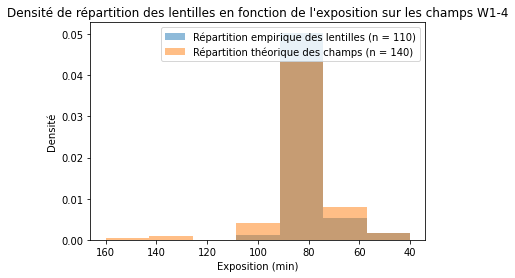

In [38]:
bins = np.linspace(40, 160, 8)

plt.hist(expo_list_lentille_noNA, bins, alpha=0.5, density=True,
         label=f"Répartition empirique des lentilles (n = {len(expo_list_lentille_noNA)})")
plt.hist(expo_list_obj_noNA, bins, alpha=0.5, density=True,
         label=f"Répartition théorique des champs (n = {len(expo_list_obj_noNA)})")
plt.legend(loc='upper right')
plt.title(
    "Densité de répartition des lentilles en fonction de l'exposition sur les champs W1-4")
plt.xlabel("Exposition (min)")
plt.ylabel("Densité")
plt.gca().invert_xaxis()
plt.show()


C:\Users\Clément\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\Clément\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


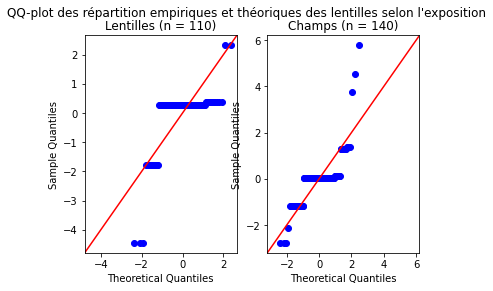

In [39]:
fig, (axe0, axe1) = plt.subplots(1, 2)
make_global_title(
    fig,
    title="QQ-plot des répartition empiriques et théoriques des lentilles selon l'exposition")
sm.qqplot(expo_list_lentille_01, line='45', ax=axe0, )
sm.qqplot(expo_list_obj_01, line='45', ax=axe1)
axe0.title.set_text(f"Lentilles (n = {len(expo_list_lentille_01)})")
axe1.title.set_text(f"Champs (n = {len(expo_list_obj_01)})")

plt.show()


In [40]:
N = 10_000
p_values = np.zeros(N)
for i in range(N):
    np.random.shuffle(expo_list_obj_noNA)
    expo_list_obj_noNA_len = expo_list_obj_noNA[0:len(expo_list_lentille_noNA)]

    _, p_values[i] = scs.wilcoxon(
        x=expo_list_lentille_noNA, y=expo_list_obj_noNA_len, alternative="two-sided")
np.mean(p_values)


0.5702765075278176

## Redshift

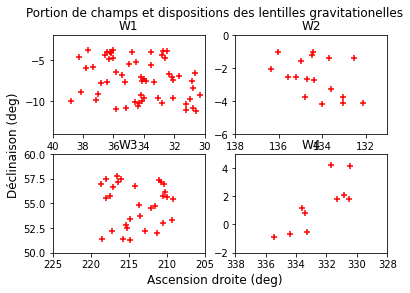

In [41]:
raL, decL = [lent.ra for lent in lentilles_list], [
    lent.dec for lent in lentilles_list]

fig, axes = plt.subplots(2, 2)
plot_sub_data(axes, [0, 0], raL, decL, (30, 40), (-14, -2), "W1")
plot_sub_data(axes, [0, 1], raL, decL, (131, 138), (-6, 0), "W2")
plot_sub_data(axes, [1, 0], raL, decL, (205, 225), (50, 60), "W3")
plot_sub_data(axes, [1, 1], raL, decL, (328, 338), (-2, 5), "W4")

make_global_title(
    fig,
    title="Portion de champs et dispositions des lentilles gravitationelles",
    x_title="Ascension droite (deg)",
    y_title="Déclinaison (deg)")

plt.show()


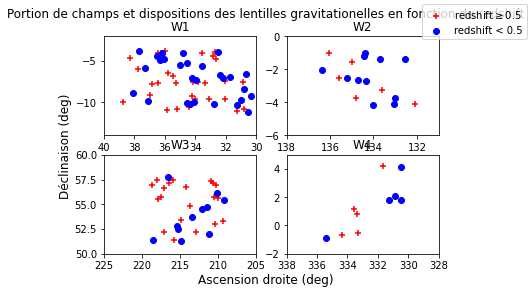

In [42]:
raL_m, decL_m = [lent.ra for lent in lentilles_list if lent.z < 0.5], [
    lent.dec for lent in lentilles_list if lent.z < 0.5]
raL_p, decL_p = [lent.ra for lent in lentilles_list if lent.z >= 0.5], [
    lent.dec for lent in lentilles_list if lent.z >= 0.5]


fig, axes = plt.subplots(2, 2)
plot_sub_data(axes, [0, 0], raL_p, decL_p, (30, 40), (-14, -2), "W1")
plot_sub_data(axes, [0, 0], raL_m, decL_m, (30, 40),
              (-14, -2), "W1", _marker='o', color='blue')

plot_sub_data(axes, [0, 1], raL_p, decL_p, (131, 138), (-6, 0), "W2")
plot_sub_data(axes, [0, 1], raL_m, decL_m, (131, 138),
              (-6, 0), "W2", _marker='o', color='blue')

plot_sub_data(axes, [1, 0], raL_p, decL_p, (205, 225), (50, 60), "W3")
plot_sub_data(axes, [1, 0], raL_m, decL_m, (205, 225),
              (50, 60), "W3", _marker='o', color='blue')

plot_sub_data(axes, [1, 1], raL_p, decL_p, (328, 338),
              (-2, 5), "W4", _label='redshift$\geq$0.5')
plot_sub_data(axes, [1, 1], raL_m, decL_m, (328, 338),
              (-2, 5), "W4", _marker='o', color='blue', _label='redshift < 0.5')
fig.legend()

make_global_title(
    fig,
    title="Portion de champs et dispositions des lentilles gravitationelles en fonction du redshift",
    x_title="Ascension droite (deg)",
    y_title="Déclinaison (deg)")

plt.show()


AttributeError: 'AxesSubplot' object has no attribute 'set_yabel'

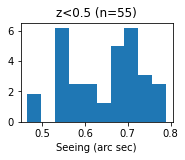

In [43]:

see_m, see_p = [lent.seeing for lent in lentilles_list if lent.z < 0.5], [
    lent.seeing for lent in lentilles_list if lent.z >= 0.5]

ax1 = plt.subplot(221)
ax1.hist(see_m, density=True)
ax1.set_title(f"z<0.5 (n={len(see_m)})")
ax1.set_xlabel("Seeing (arc sec)")
ax1.set_yabel("Densité")


ax2 = plt.subplot(222)
ax2.hist(see_p, density=True)
ax2.set_title(f"z$\geq$0.5 (n={len(see_p)})")
ax2.set_xlabel("Seeing (arc sec)")
ax2.set_yabel("Densité")


ax3 = plt.subplot(212)
ax3.hist(see_m, alpha=0.5, density=True, label=f"z<0.5 (n={len(see_m)})")
ax3.hist(see_p, alpha=0.5, density=True, label=f"z$\geq$0.5 (n={len(see_p)})")
ax3.set_xlabel("Seeing (arc sec)")
ax3.set_yabel("Densité")
ax3.legend()
plt.suptitle(
    "Histogrammes de densité de seeing des lentilles en fonction du redshift")

plt.show()
